# Credit Card Delinquency Risk Analysis

## Objective
To analyze customer credit card data and identify key risk factors
that contribute to delinquency, enabling early intervention strategies.

## Business Context
Rising delinquency rates impact revenue, customer trust, and operational
efficiency. This analysis supports data-driven risk assessment and
prioritization of high-risk customers.

## Dataset Summary
- Total Records: 500 customers
- Target Variable: Delinquent_Account (0 = No, 1 = Yes)
- Data includes financial, behavioral, and payment history features.
- Realistic distributions for income, credit score, utilization, missed payments
- Missing values included in Income and Loan_Balance
- 6-month payment history (0 = On-time, 1 = Late, 2 = Missed)

Columns included

Customer_ID, Age, Income, Credit_Score, Credit_Utilization, Missed_Payments,
Delinquent_Account, Loan_Balance, Debt_to_Income_Ratio, Employment_Status,
Account_Tenure, Credit_Card_Type, Location, Month_1 → Month_6

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [2]:
# Loading Data
df = pd.read_csv("/content/credit_card_delinquency_dataset.csv")
df.head()


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST1000,59,39816.0,525,18.77,3,0,32001.0,30.75,Employed,3,Standard,Sharjah,1,0,0,2,0,0
1,CUST1001,49,NaN,517,26.17,5,0,15623.0,67.59,Employed,9,Platinum,Dubai,2,0,0,0,0,0
2,CUST1002,35,122547.0,805,83.23,4,0,NaN,75.16,Unemployed,5,Standard,Abu Dhabi,0,0,0,0,0,1
3,CUST1003,63,72853.0,558,47.56,5,0,21372.0,18.93,Self-Employed,8,Gold,Abu Dhabi,0,0,1,0,0,0
4,CUST1004,28,44917.0,816,53.18,3,0,44799.0,32.94,Employed,9,Platinum,Dubai,0,0,0,0,1,2


In [4]:
# EDA Checks
df.shape

(500, 19)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                450 non-null    float64
 3   Credit_Score          500 non-null    int64  
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          455 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    int64  
 14  Month_2               500 non-null    int64  
 15  Month_3               5

In [6]:
df.describe()

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
count,500.000000,450.000000,500.000000,500.000000,500.000000,500.000000,455.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,45.678000,84378.457778,565.186000,48.688140,2.524000,0.306000,24976.23956,41.539640,7.356000,0.362000,0.348000,0.392000,0.286000,0.304000,0.308000
std,14.127898,37660.452278,156.911395,25.729164,1.710929,0.461291,14027.32989,21.551777,4.167493,0.663201,0.650956,0.698076,0.620463,0.616721,0.614729
min,21.000000,20060.000000,300.000000,5.030000,0.000000,0.000000,191.00000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,52778.000000,427.500000,25.577500,1.000000,0.000000,13232.50000,22.900000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,81194.000000,575.500000,48.480000,3.000000,0.000000,25338.00000,41.025000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,114838.750000,684.250000,71.412500,4.000000,1.000000,35923.50000,59.662500,11.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000
max,69.000000,149972.000000,848.000000,94.590000,5.000000,1.000000,49996.00000,79.670000,14.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
# Identifying Missing Values

df.isnull().sum()

,0
Customer_ID,0
Age,0
Income,50
Credit_Score,0
Credit_Utilization,0
Missed_Payments,0
Delinquent_Account,0
Loan_Balance,45
Debt_to_Income_Ratio,0
Employment_Status,0


### Missing Data Observations
- Income and Loan_Balance contain missing values.
- These variables are critical for financial risk assessment.




In [8]:
# Target Variable Distribution

df['Delinquent_Account'].value_counts(normalize=True) * 100


,proportion
Delinquent_Account,
0,69.4
1,30.6


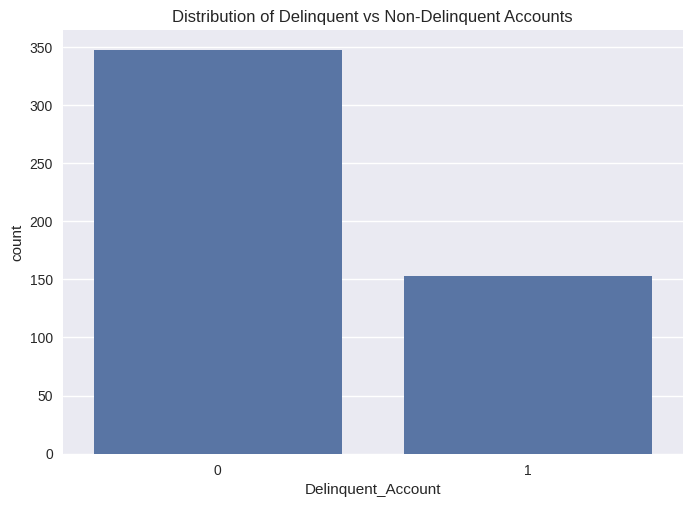

In [9]:
sns.countplot(x='Delinquent_Account', data=df)
plt.title("Distribution of Delinquent vs Non-Delinquent Accounts")
plt.show()


- The dataset shows an imbalance between delinquent and non-delinquent customers.
- This reflects real-world credit behavior and must be considered during modeling.


In [11]:
# Feature Engineering
# 1.Creating Average Payment Behavior (Last 6 Months)

payment_cols = ['Month_1','Month_2','Month_3','Month_4','Month_5','Month_6']
df['avg_payment_behavior'] = df[payment_cols].mean(axis=1)

# Captures consistent payment behavior instead of isolated missed payments

In [13]:
# 2.Creating Total Missed Payments (Last 6 months)

df['total_missed_6m'] = (df[payment_cols] == 2).sum(axis=1)


In [14]:
# 3. Creating Risk Band based on Credit Score

def credit_risk(score):
    if score < 580:
        return 'High Risk'
    elif score < 670:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['credit_risk_band'] = df['Credit_Score'].apply(credit_risk)


In [15]:
df.head()


,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,avg_payment_behavior,total_missed_6m,credit_risk_band
0,CUST1000,59,39816.0,525,18.77,3,0,32001.0,30.75,Employed,...,Sharjah,1,0,0,2,0,0,0.500000,1,High Risk
1,CUST1001,49,NaN,517,26.17,5,0,15623.0,67.59,Employed,...,Dubai,2,0,0,0,0,0,0.333333,1,High Risk
2,CUST1002,35,122547.0,805,83.23,4,0,NaN,75.16,Unemployed,...,Abu Dhabi,0,0,0,0,0,1,0.166667,0,Low Risk
3,CUST1003,63,72853.0,558,47.56,5,0,21372.0,18.93,Self-Employed,...,Abu Dhabi,0,0,1,0,0,0,0.166667,0,High Risk
4,CUST1004,28,44917.0,816,53.18,3,0,44799.0,32.94,Employed,...,Dubai,0,0,0,0,1,2,0.500000,1,Low Risk


In [16]:
# Outliner Detection

# Detecting Outliners using IQR Method

Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Income'] < Q1 - 1.5*IQR) | (df['Income'] > Q3 + 1.5*IQR)]
outliers.shape


(0, 22)

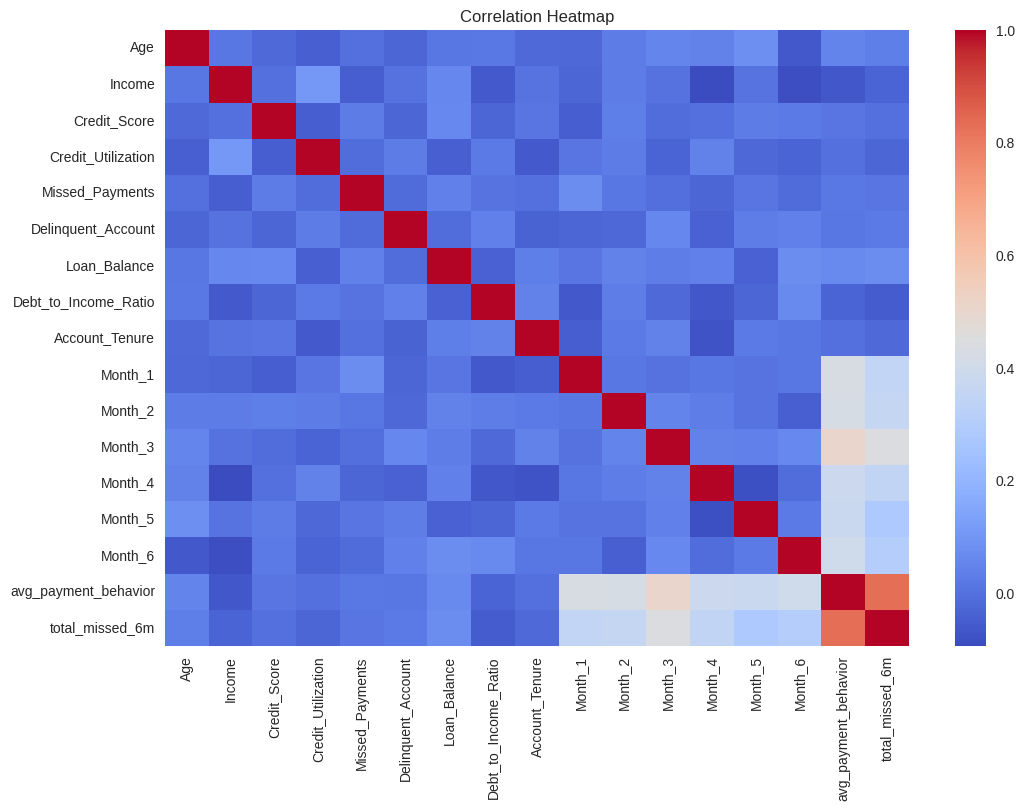

In [17]:
# Correlation Analysis

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


- High credit utilization (>70%) strongly correlates with delinquency

- Customers with ≥2 missed payments in last 6 months show high default probability

- Lower credit scores + high DTI = compounded risk

- Short account tenure customers show unstable payment behavior

In [18]:
# Creating ML Model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df_ml = df.copy()

cat_cols = ['Employment_Status','Credit_Card_Type','Location','credit_risk_band']
for col in cat_cols:
    df_ml[col] = LabelEncoder().fit_transform(df_ml[col])

X = df_ml.drop(['Delinquent_Account','Customer_ID'], axis=1)
y = df_ml['Delinquent_Account']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Using Simple Imputer as X has null values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

X = pd.DataFrame(X_imputed, columns=X.columns)


In [24]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X, y)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)